# Iris Dataset With K-Nearest Neighbors

In [82]:
import pandas
import seaborn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [83]:
iris_dataset = pandas.read_csv("Machine Learning Data Set/iris.csv")
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [84]:
iris_dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [85]:
labels = iris_dataset['species']
iris_dataset.drop(['species'], axis=1, inplace=True)
values = iris_dataset.values

In [86]:
train_values, test_values, train_labels, test_labels = \
train_test_split(values, labels, stratify=labels, random_state=42)

In [87]:
knn_clasifier = KNeighborsClassifier()
knn_clasifier.fit(train_values, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
print("Accuracy with 5 neighbors on training set: {:.3f}".format(knn_clasifier.score(train_values, train_labels)))
print("Accuracy with 5 neighbors on test set: {:.3f}".format(knn_clasifier.score(test_values, test_labels)))

Accuracy with 5 neighbors on training set: 0.973
Accuracy with 5 neighbors on test set: 0.974


In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = dict(n_neighbors = list(range(2, 21)))
cross_valid = GridSearchCV(knn_clasifier, param_grid, cv=5, scoring='accuracy')

In [91]:
cross_valid.fit(train_values, train_labels);

In [108]:
print('Best parameter for nearest neighbors classifier: {parameter}.\n\
Highest score on cross validation: {score:.3f}'.format(parameter=cross_valid.best_params_['n_neighbors'], 
                                                score=cross_valid.best_score_))

Best parameter for nearest neighbors classifier: 11.
Highest score on cross validation: 0.973


In [94]:
cross_valid_represent_train = cross_valid_results.loc[0:, ['param_n_neighbors', 'mean_train_score']]
cross_valid_represent_train

,param_n_neighbors,mean_train_score
0,1,1.000000
1,2,0.984316
2,3,0.961939
3,4,0.968706
4,5,0.973102
5,6,0.973102
6,7,0.970880
7,8,0.975401
8,9,0.975425
9,10,0.979971


In [95]:
cross_valid_represent_test = cross_valid_results.loc[0:, ['param_n_neighbors', 'mean_test_score']]
cross_valid_represent_test

,param_n_neighbors,mean_test_score
0,1,0.955357
1,2,0.937500
2,3,0.955357
3,4,0.928571
4,5,0.955357
5,6,0.946429
6,7,0.964286
7,8,0.955357
8,9,0.964286
9,10,0.964286


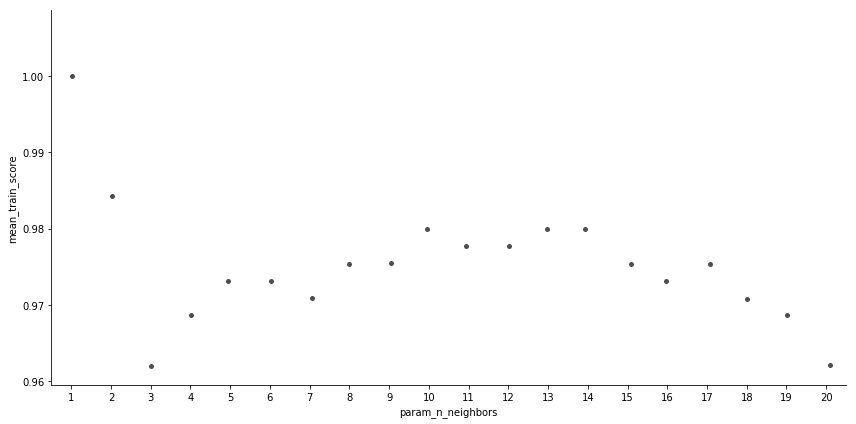

In [146]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (12, 8)
seaborn.catplot(x='param_n_neighbors', y='mean_train_score', data=cross_valid_represent_train, color='.3', height=6, aspect=2);

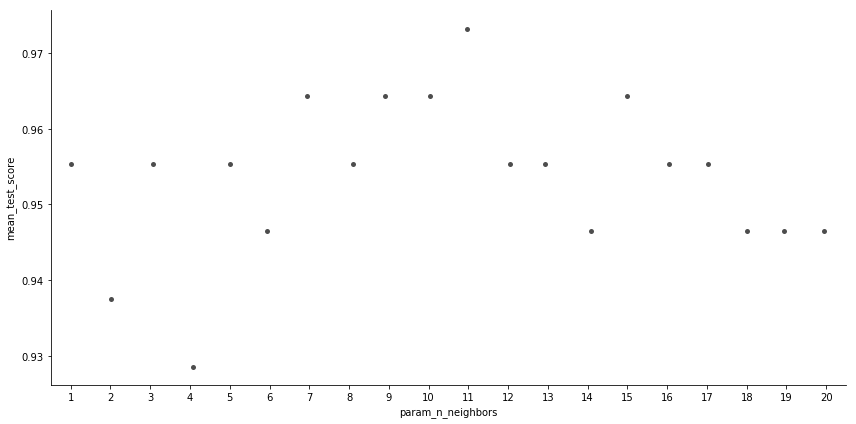

In [147]:
seaborn.catplot(x='param_n_neighbors', y='mean_test_score', data=cross_valid_represent_test, color='.3', height=6, aspect=2);